In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [57]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [58]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 2D image to 1D vector
    Dense(128, activation='relu'),  # Hidden layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with Softmax activation
])


C:\Users\sasan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [60]:
model.fit(
    x_train, y_train, 
    epochs=5,  # Number of training epochs
    batch_size=32,  # Number of samples per gradient update
    validation_split=0.2  # Use 20% of the training data for validation
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8695 - loss: 0.4722 - val_accuracy: 0.9567 - val_loss: 0.1540
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9605 - loss: 0.1363 - val_accuracy: 0.9653 - val_loss: 0.1184
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9732 - loss: 0.0892 - val_accuracy: 0.9695 - val_loss: 0.1045
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9814 - loss: 0.0680 - val_accuracy: 0.9665 - val_loss: 0.1121
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9844 - loss: 0.0491 - val_accuracy: 0.9747 - val_loss: 0.0845


In [61]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0876
Test Accuracy: 0.98


In [62]:
model.save('numrec_model.h5')

In [63]:
model.save_weights('numrec.weights.h5')


In [64]:
sample_image = x_test[1200]
predicted_class = np.argmax(model.predict(sample_image.reshape(1, 28, 28)), axis=-1)
print(f"Predicted Class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class: 8


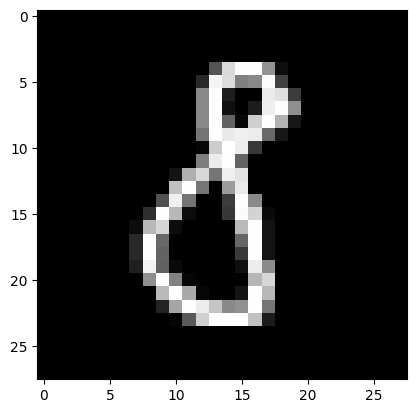

In [65]:
%matplotlib inline
plt.imshow(x_test[1200],cmap='gray', interpolation='nearest')